In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('Electric_Production.csv',parse_dates=['DATE'])
data.columns=data.columns.str.lower()
data.head()

,date,value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [ ]:
data.dtypes

date     datetime64[ns]
value           float64
dtype: object

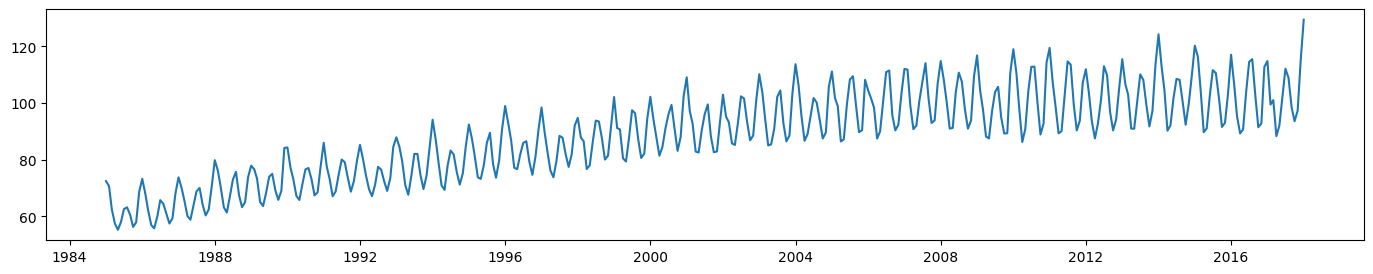

In [ ]:
plt.figure(figsize=(17,3))
plt.plot(data['date'],data['value'])

## **SARIMA**

In [ ]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

In [ ]:
t=np.arange(1,data.shape[0]+1)
reg=smf.ols('Y~t',data=pd.DataFrame({'Y':data.value,'t':t.tolist()}))
model_reg=reg.fit()
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     898.2
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          9.03e-104
Time:                        11:58:34   Log-Likelihood:                -1412.6
No. Observations:                 397   AIC:                             2829.
Df Residuals:                     395   BIC:                             2837.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.6070      0.856     77.781      0.0

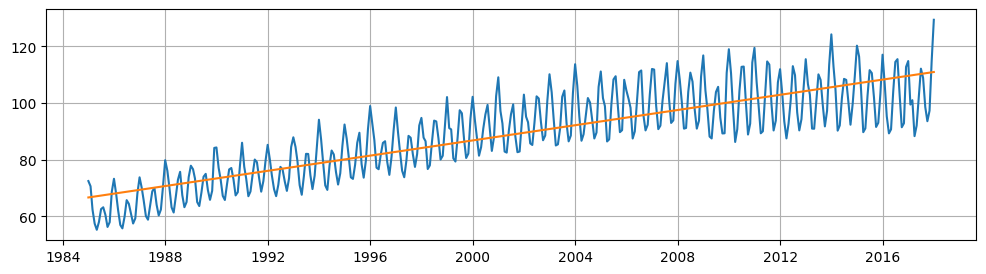

In [ ]:
b0=model_reg.params[0]
b1=model_reg.params[1]

plt.figure(figsize=(12,3))
plt.plot(data['date'],data['value'])
plt.plot(data['date'],b0+b1*t)
plt.grid(True)
plt.show()

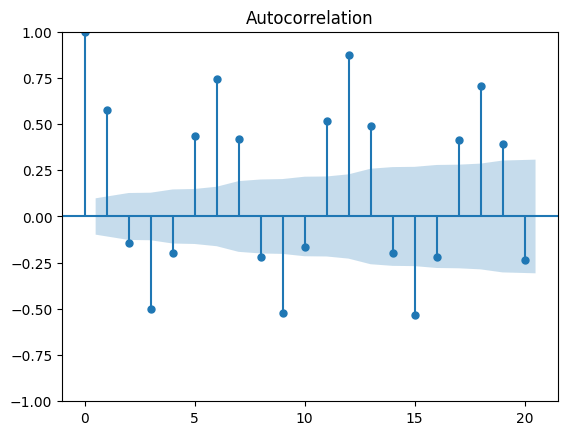

In [ ]:
#acf to determine f
residuals=model_reg.resid
sm.graphics.tsa.plot_acf(residuals,lags=20)
plt.show()

In [ ]:
#add seasonality
f=1/6
reg=smf.ols('Y~t+np.cos(2*np.pi*f*t)+np.sin(2*np.pi*f*t)',data=pd.DataFrame({'Y':data.value,'t':t.tolist()}))
model_reg=reg.fit()
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1093.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          3.01e-190
Time:                        10:37:53   Log-Likelihood:                -1204.5
No. Observations:                 397   AIC:                             2417.
Df Residuals:                     393   BIC:                             2433.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

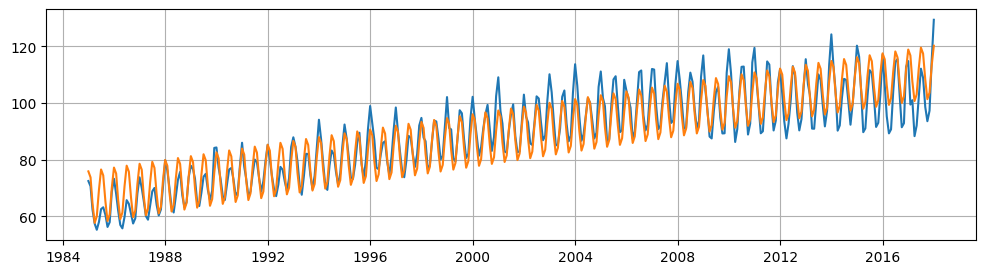

In [ ]:
b0=model_reg.params[0]
b1=model_reg.params[1]
b2=model_reg.params[2]
b3=model_reg.params[3]

plt.figure(figsize=(12,3))
plt.plot(data['date'],data['value'])
plt.plot(data['date'],b0+b1*t+b2*np.cos(2*np.pi*f*t)+b3*np.sin(2*np.pi*f*t))
plt.grid(True)
plt.show()

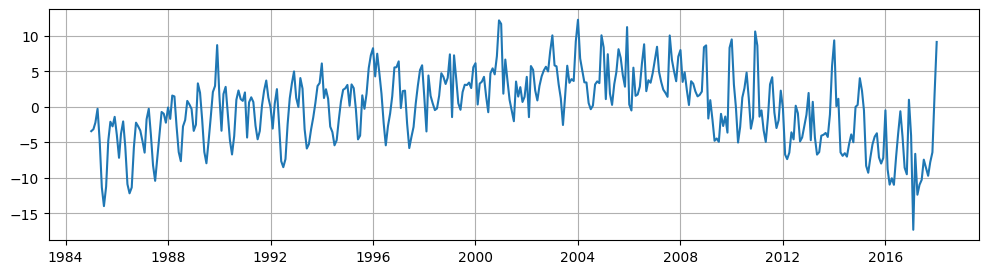

In [ ]:
plt.figure(figsize=(12,3))
plt.plot(data['date'],data['value']-(b0+b1*t+b2*np.cos(2*np.pi*f*t)+b3*np.sin(2*np.pi*f*t)))
plt.grid(True)
plt.show()

In [ ]:
#add 2nd polynomial term
f=1/6
reg=smf.ols('Y~t+np.power(t,2)+np.cos(2*np.pi*f*t)+np.sin(2*np.pi*f*t)',data=pd.DataFrame({'Y':data.value,'t':t.tolist()}))
model_reg=reg.fit()
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1453.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          1.52e-233
Time:                        12:01:08   Log-Likelihood:                -1099.8
No. Observations:                 397   AIC:                             2210.
Df Residuals:                     392   BIC:                             2230.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

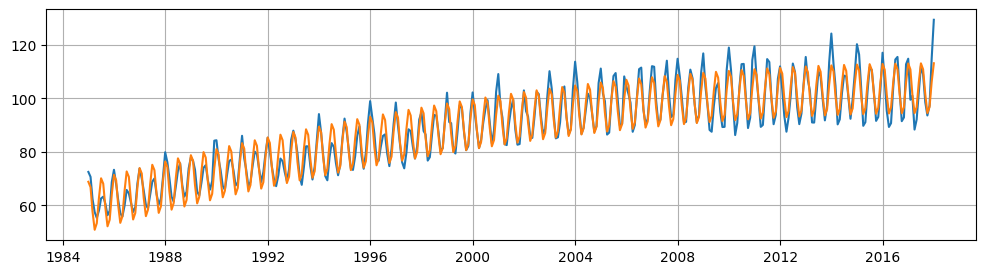

In [ ]:
b0=model_reg.params[0]
b1=model_reg.params[1]
b2=model_reg.params[2]
b3=model_reg.params[3]
b4=model_reg.params[4]

plt.figure(figsize=(12,3))
plt.plot(data['date'],data['value'])
plt.plot(data['date'],b0+b1*t+b2*t**2+b3*np.cos(2*np.pi*f*t)+b4*np.sin(2*np.pi*f*t))
plt.grid(True)
plt.show()

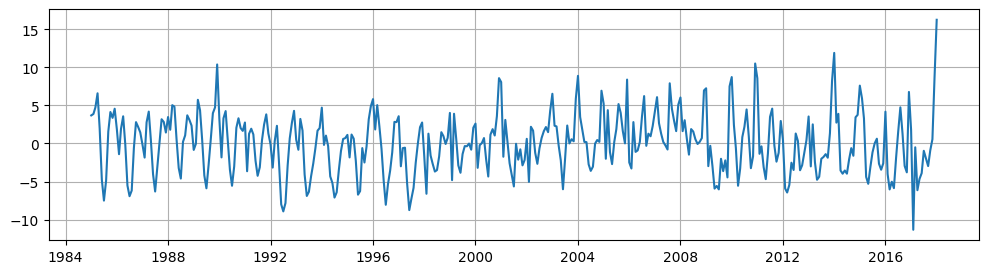

In [ ]:
#remove trend and seasonality
plt.figure(figsize=(12,3))
plt.plot(data['date'],data['value']-(b0+b1*t+b2*t**2+b3*np.cos(2*np.pi*f*t)+b4*np.sin(2*np.pi*f*t)))
plt.grid(True)
plt.show()

In [ ]:
#check for stationarity
X=data['value']-(b0+b1*t+b2*t**2+b3*np.cos(2*np.pi*f*t)+b4*np.sin(2*np.pi*f*t))
adf_test = adfuller(X)
print('ADF Statistic: %f' % adf_test[0])

print('p-value: %f' % adf_test[1])

print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))
if adf_test[0] > adf_test[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Stationary")

ADF Statistic: -3.735573
p-value: 0.003640
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
Failed to Reject Ho - Time Series is Stationary


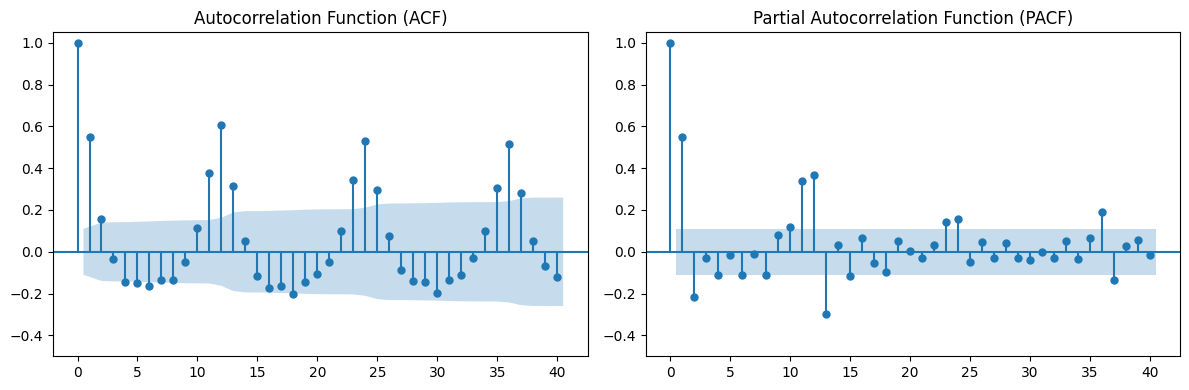

In [ ]:
#split dataset
split=int(len(X)*0.8)

fig, axes=plt.subplots(1, 2, figsize=(12, 4))
y_lower_limit, y_upper_limit=-0.5,1.05
# Plot ACF
sm.graphics.tsa.plot_acf(X[:split], lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_ylim(y_lower_limit, y_upper_limit)

# Plot PACF
sm.graphics.tsa.plot_pacf(X[:split], lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_ylim(y_lower_limit, y_upper_limit)

plt.tight_layout()
plt.show()

In [ ]:
#SARIMA implementation
model = sm.tsa.statespace.SARIMAX(X[:split],
                         order=(3, 0, 3),
                         seasonal_order=(0, 1, 1, 12))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                value   No. Observations:                  317
Model:             SARIMAX(3, 0, 3)x(0, 1, [1], 12)   Log Likelihood                -665.645
Date:                              Mon, 30 Oct 2023   AIC                           1347.290
Time:                                      12:17:20   BIC                           1377.052
Sample:                                           0   HQIC                          1359.194
                                              - 317                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8179      0.118     -6.939      0.000      -1.049      -0.587
ar.L2         -0.31

Shapiro-Wilk Test p-value: 0.08220261335372925
Kolmogorov-Smirnov Test p-value: 7.824033998676069e-10


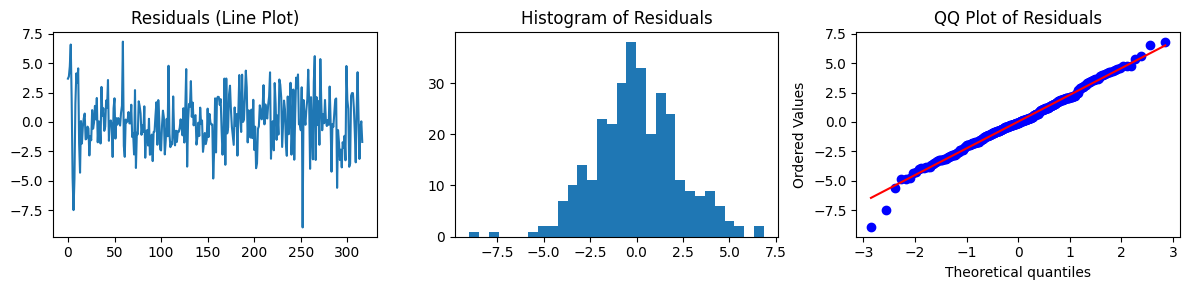

In [ ]:
res=result.resid

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot(res)
plt.title('Residuals (Line Plot)')

# Create a histogram of the residuals
plt.subplot(1, 3, 2)
plt.hist(res, bins=30)
plt.title('Histogram of Residuals')

# QQ plot of the residuals
plt.subplot(1, 3, 3)
stats.probplot(res, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(res)
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)

# Kolmogorov-Smirnov test for normality
ks_test = stats.kstest(res, 'norm')
print("Kolmogorov-Smirnov Test p-value:", ks_test.pvalue)

plt.tight_layout()
plt.show()

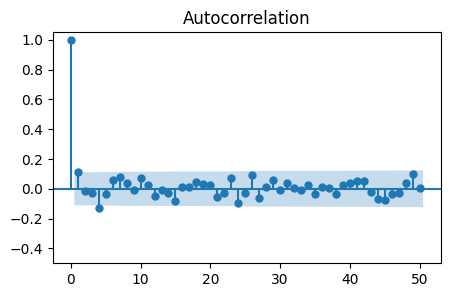

In [ ]:
fig,ax=plt.subplots(figsize=(5,3))

y_lower_limit, y_upper_limit=-0.5,1.05

sm.graphics.tsa.plot_acf(res,lags=50,ax=ax)
ax.set_ylim(y_lower_limit, y_upper_limit)
plt.show()

In [ ]:
lb_test = sm.stats.diagnostic.acorr_ljungbox(res, lags=[10], boxpierce=False,model_df=2)

# Extract the p-values from the test results
print(f'Box-Ljung stat: {lb_test.iloc[:,0].values[0]}, p-value: {lb_test.iloc[:,1].values[0]}')

Box-Ljung stat: 13.359219800437574, p-value: 0.10007318199021381


In [ ]:
k = len(X[split:])

# Perform forecasting
prX=result.get_forecast(steps=k)
prX_mean = prX.predicted_mean
prX_ci = prX.conf_int()

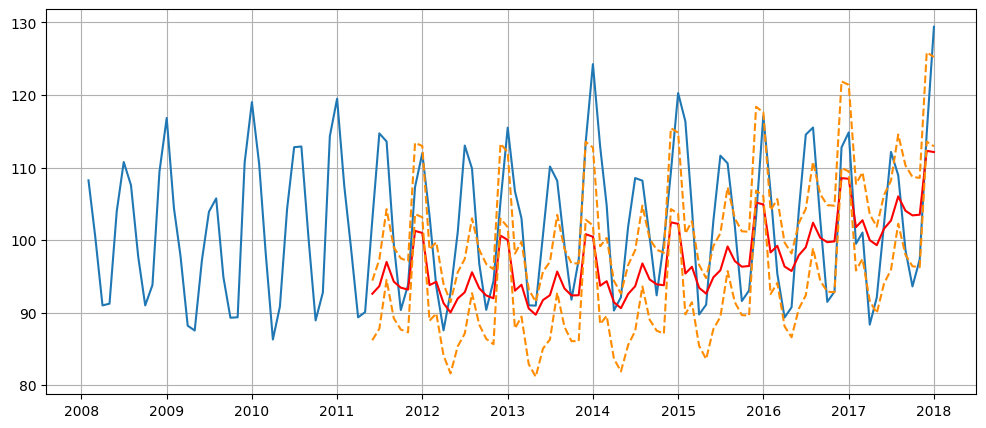

In [ ]:
k=len(X[split:])

# Calculate the future time indices
n = len(X[:split])
i = np.arange(1, k+1)
f = 1/200
s1 = np.cos(2 * np.pi * f * (n + i))
s2 = np.sin(2 * np.pi * f * (n + i))

# Forecast future values using the ARIMA model
prX = result.get_forecast(steps=k)
prX_mean = prX.predicted_mean
prX_ci = prX.conf_int()
# Calculate the predicted Y values for the future
prY = b0 + b1*(n + i) + b2*np.power(n+i,2)  + b3*s1 + b4*s2 + prX_mean
UprY=prY+prX_ci.iloc[:,0]
LprY=prY+prX_ci.iloc[:,1]

#plot
plt.figure(figsize=(12,5))
plt.plot(data['date'][-120:],data['value'][-120:])
plt.plot(data['date'][split:],prY,color='red')
plt.plot(data['date'][split:],UprY,color='darkorange',linestyle='--')
plt.plot(data['date'][split:],LprY,color='darkorange',linestyle='--')
plt.grid(True)
plt.show()

## Prohpet library

 Forecasting using Facebook library

In [ ]:
from prophet import Prophet

In [ ]:
#split dataset

split=int(len(data['value'])*0.8)
df=data.copy()
df.rename(columns={'date':'ds','value':'y'},inplace=True)

In [ ]:
k = len(X[split:])
model = Prophet()
model.fit(df.iloc[:split,:])
future = model.make_future_dataframe(periods=k, freq='M')

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoyocug14/5ai1zwil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoyocug14/6t1s1_u1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37630', 'data', 'file=/tmp/tmpoyocug14/5ai1zwil.json', 'init=/tmp/tmpoyocug14/6t1s1_u1.json', 'output', 'file=/tmp/tmpoyocug14/prophet_modelqw8bnaa_/prophet_model-20231030130857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
392,2017-08-31,103.242626,99.823082,106.546748
393,2017-09-30,97.088174,93.702831,100.833538
394,2017-10-31,99.190408,95.683539,102.645255
395,2017-11-30,109.742381,106.184184,113.128803
396,2017-12-31,120.646154,117.279620,124.261779


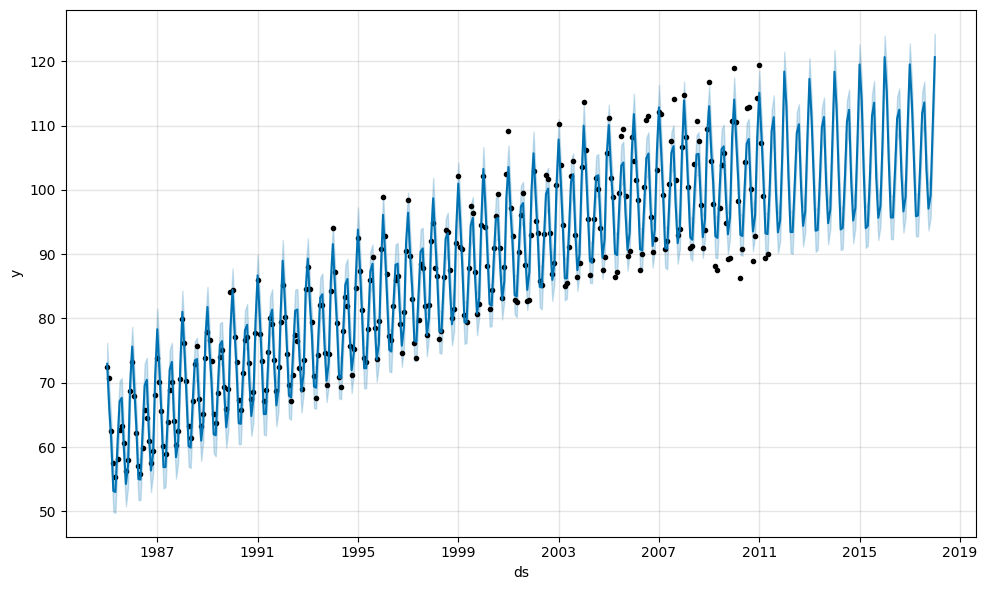

In [ ]:
fig1 = model.plot(forecast)

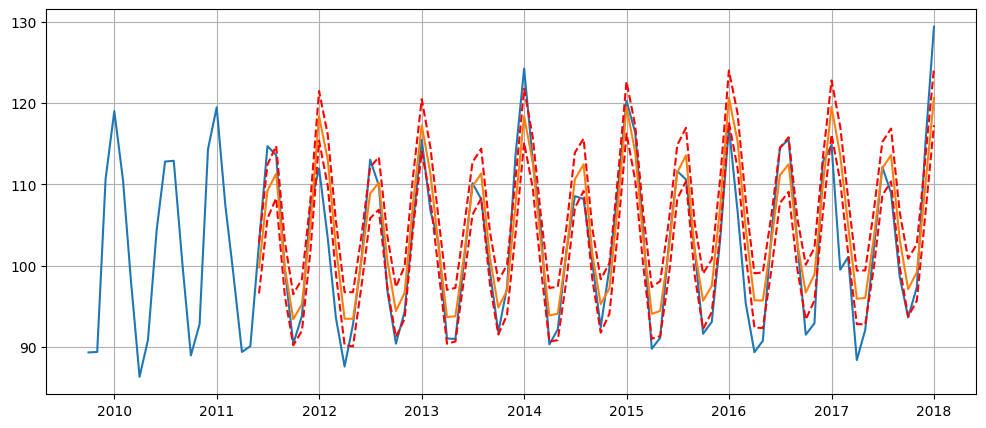

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(data['date'][-100:],data['value'][-100:])
plt.plot(data['date'][split:],forecast['yhat'][split:])
plt.plot(data['date'][split:],forecast['yhat_lower'][split:],color='red',linestyle='--')
plt.plot(data['date'][split:],forecast['yhat_upper'][split:],color='red',linestyle='--')
plt.grid(True)
plt.show()

## Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from pylab import rcParams
from tqdm import tqdm
import warnings


[0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.5999999999999999, 0.6499999999999999, 0.7, 0]


In [ ]:
#split dataset
Y=data['value']
split=int(len(Y)*0.8)

# grid search using train test and val data

m=int((len(Y)-split)*0.65)
k=len(Y)-(split+m)
Y_train=Y[:split]

alphas =np.arange(0.3,0.75,0.05).tolist();alphas.append(0)
betas = np.arange(0.3,0.75,0.05).tolist();betas.append(0)
gammas = np.arange(0.3,0.75,0.05).tolist();gammas.append(0)
seasonal_periods = [9,12,15] #based on f (mentioned previously)
trends=[None,'add','mul']
seasonals=[None,'add','mul']
best_mae = float('inf')

bootstrap_alpha = []
bootstrap_beta = []
bootstrap_gamma = []

#explore the best parameters
warnings.filterwarnings('ignore')
for i in tqdm(range(len(alphas))):
  alpha=alphas[i]
  for beta in betas:
      for gamma in gammas:
          for seasonal_period in seasonal_periods:
            for trend in trends:
              for seasonal in seasonals:
                  # Create and fit the Holt-Winters model with the current hyperparameters
                  model = ExponentialSmoothing(Y[:split],trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period)
                  model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

                  # Make forecasts
                  forecast_train = model_fit.predict(start=Y[:split].index[0],end=Y[:split].index[-1])
                  forecast_val = model_fit.forecast(steps=m)
                  # Calculate the Mean Squared Error (MSE)
                  try:
                    mae =  np.abs(mean_absolute_error(Y[:(split)], forecast_train)-mean_absolute_error(Y[split:(split+m)], forecast_val))
                  except:
                    pass

                  # Number of bootstrap samples
                  n_samples = 1000

                  # Perform bootstrap resampling
                  for _ in range(n_samples):
                      # Resample the data with replacement
                      resampled_data = np.random.choice(Y, size=len(Y), replace=True)

                      # Fit a Holt-Winters model to the resampled data
                      model = ExponentialSmoothing(Y[:(split+m)], trend=best_trend,seasonal=best_seasonal, seasonal_periods=best_seasonal_period)
                      resampled_model = model.fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)


                      # Store the parameter estimates from the resampled model
                      bootstrap_alpha.append(resampled_model.params['smoothing_level'])
                      bootstrap_beta.append(resampled_model.params['smoothing_trend'])
                      bootstrap_gamma.append(resampled_model.params['smoothing_seasonal'])

                  # Calculate the parameter estimates from the original model
                  original_alpha = model.params['smoothing_level']
                  original_beta = model.params['smoothing_trend']
                  original_gamma = model.params['smoothing_seasonal']

                  # Calculate p-values by comparing the original parameter estimates to the bootstrap distribution
                  p_value_alpha = 2 * min(np.mean(bootstrap_alpha >= original_alpha), np.mean(bootstrap_alpha <= original_alpha))
                  p_value_beta = 2 * min(np.mean(bootstrap_beta >= original_beta), np.mean(bootstrap_beta <= original_beta))
                  p_value_gamma = 2 * min(np.mean(bootstrap_gamma >= original_gamma), np.mean(bootstrap_gamma <= original_gamma))


                  # Check if this combination produces a better MAE
                  if (mae < best_mae) and  p_value_alpha<0.05 and p_value_beta<0.05 and p_value_gamma<0.05  :
                      best_alpha = alpha
                      best_beta = beta
                      best_gamma = gamma
                      best_seasonal_period = seasonal_period
                      best_mse = mae
                      best_trend=trend
                      best_seasonal=seasonal
                      best_mae=np.mean(np.abs(Y[:split]-forecast_train))

In [ ]:
#split dataset
Y=data['value']
split=int(len(Y)*0.8)

# grid search using train test and val data

m=int((len(Y)-split)*0.65)
k=len(Y)-(split+m)
Y_train=Y[:split]

alphas =np.arange(0.3,0.75,0.05).tolist();alphas.append(0)
betas = np.arange(0.3,0.75,0.05).tolist();betas.append(0)
gammas = np.arange(0.3,0.75,0.05).tolist();gammas.append(0)
seasonal_periods = [9,12,15] #based on f (mentioned previously)
trends=[None,'add','mul']
seasonals=[None,'add','mul']
best_mae = float('inf')

#explore the best parameters
warnings.filterwarnings('ignore')
for i in tqdm(range(len(alphas))):
  alpha=alphas[i]
  for beta in betas:
      for gamma in gammas:
          for seasonal_period in seasonal_periods:
            for trend in trends:
              for seasonal in seasonals:
                  # Create and fit the Holt-Winters model with the current hyperparameters
                  model = ExponentialSmoothing(Y[:split],trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period)
                  model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

                  # Make forecasts
                  forecast_train = model_fit.predict(start=Y[:split].index[0],end=Y[:split].index[-1])
                  forecast_val = model_fit.forecast(steps=m)
                  # Calculate the Mean Squared Error (MSE)
                  try:
                    mae =  np.abs(mean_absolute_error(Y[:(split)], forecast_train)-mean_absolute_error(Y[split:(split+m)], forecast_val))
                  except:
                    pass

                  # Calculate t-statistics and p-values
                  def calculate_p_value(t_statistic, degrees_of_freedom):
                      p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))
                      return p_value

                  params = model_fit.params
                  df = len(Y) - len(params)

                  t_stat_alpha = params['smoothing_level'] / np.std(model_fit.model.endog)
                  t_stat_beta = params['smoothing_trend'] / np.std(model_fit.model.endog)
                  t_stat_gamma = params['smoothing_seasonal'] / np.std(model_fit.model.endog)

                  p_value_alpha = calculate_p_value(t_stat_alpha, df)
                  p_value_beta = calculate_p_value(t_stat_beta, df)
                  p_value_gamma = calculate_p_value(t_stat_gamma, df)


                  #

                  # Check if this combination produces a better MAE
                  if (mae < best_mae) and  p_value_alpha<0.05 and p_value_beta<0.05 and p_value_gamma<0.05  :
                      best_alpha = alpha
                      best_beta = beta
                      best_gamma = gamma
                      best_seasonal_period = seasonal_period
                      best_mse = mae
                      best_trend=trend
                      best_seasonal=seasonal
                      best_mae=np.mean(np.abs(Y[:split]-forecast_train))

100%|██████████| 10/10 [15:02<00:00, 90.22s/it]


In [ ]:
print("Best Hyperparameters:")
print(f"Alpha: {best_alpha}")
print(f"Beta: {best_beta}")
print(f"Gamma: {best_gamma}")
print(f"Seasonal Period: {best_seasonal_period}")
print(f"Trend: {best_trend}")
print(f"Seasonal: {best_seasonal}")
print(f"Best MAE: {best_mae}")

Best Hyperparameters:
Alpha: 0.7
Beta: 0.7
Gamma: 0.7
Seasonal Period: 12
Trend: None
Seasonal: mul
Best MAE: inf


In [ ]:
model = ExponentialSmoothing(Y[:(split+m)], trend=best_trend,seasonal=best_seasonal, seasonal_periods=best_seasonal_period)
model_fit = model.fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

params = model_fit.params
df = len(Y) - len(params)

# Calculate t-statistics and p-values
def calculate_p_value(t_statistic, degrees_of_freedom):
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))
    return p_value

t_stat_alpha = params['smoothing_level'] / np.std(model_fit.model.endog)
t_stat_beta = params['smoothing_trend'] / np.std(model_fit.model.endog)
t_stat_gamma = params['smoothing_seasonal'] / np.std(model_fit.model.endog)

p_value_alpha = calculate_p_value(t_stat_alpha, df)
p_value_beta = calculate_p_value(t_stat_beta, df)
p_value_gamma = calculate_p_value(t_stat_gamma, df)
print(f"P-value for beta: {p_value_alpha}")
print(f"P-value for beta: {p_value_beta}")
print(f"P-value for gamma: {p_value_gamma}")

P-value for beta: 0.9632377351733539
P-value for beta: 0.9632377351733539
P-value for gamma: 0.9632377351733539


In [ ]:
model = ExponentialSmoothing(Y[:(split+m)], trend=best_trend,seasonal=best_seasonal, seasonal_periods=12)
model_fit = model.fit()


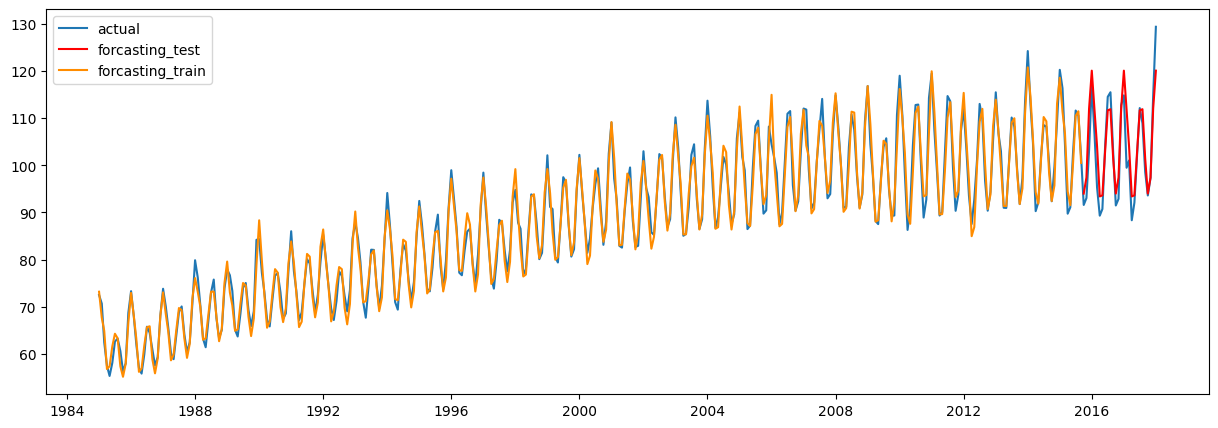

In [ ]:
forecast_test = model_fit.forecast(steps=k)
forecast_train = model_fit.predict(start=Y[:split+m].index[0],end=Y[:split+m].index[-1])

plt.figure(figsize=(15,5))
plt.plot(data['date'],Y,label='actual')
plt.plot(data['date'][split+m:],forecast_test,label='forcasting_test',color='red')
plt.plot(data['date'][:split+m],forecast_train,label='forcasting_train',color='darkorange')
plt.legend()

<Figure size 1500x500 with 0 Axes>

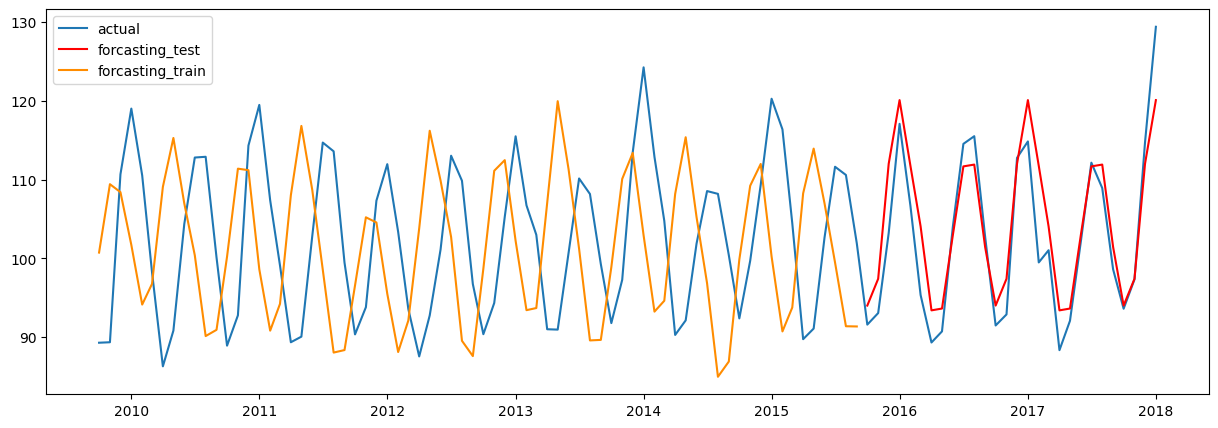

In [ ]:
plt.figure(figsize=(15,5))
plt.figure(figsize=(15,5))
plt.plot(data['date'][-100:],Y[-100:],label='actual')
plt.plot(data['date'][split+m:],forecast_test,label='forcasting_test',color='red')
plt.plot(data['date'][-100:split+m-len(data['date'])],forecast_train[-100:split+m-len(data['date'])],label='forcasting_train',color='darkorange')
plt.legend()

## skforecast library

Use of classical algorithms throughout fixed window size.

In [ ]:
!pip install skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from skforecast.model_selection import grid_search_forecaster
from sklearn.metrics import mean_absolute_error

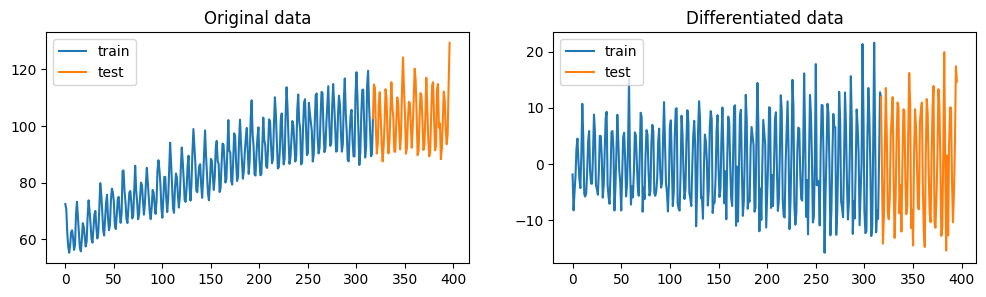

In [ ]:
split=int(len(data['value'])*0.8)
Y=data['value']
Y_diff=pd.Series(np.diff(Y))
steps=len(Y.loc[split:])

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs = axs.ravel()
Y.loc[:split].plot(ax=axs[0], label='train')
Y.loc[split:].plot(ax=axs[0], label='test')
axs[0].legend()
axs[0].set_title('Original data')

Y_diff.loc[:split].plot(ax=axs[1], label='train')
Y_diff.loc[split:].plot(ax=axs[1], label='test')
axs[1].legend()
axs[1].set_title('Differentiated data');

* Forecasting without differentiation

As an initial approach we are going to try simple versions of Random Forest and XGBOOST.

Error (MAE) Random Forest: 8.25
Error (MAE) Gradient Boosting: 7.89


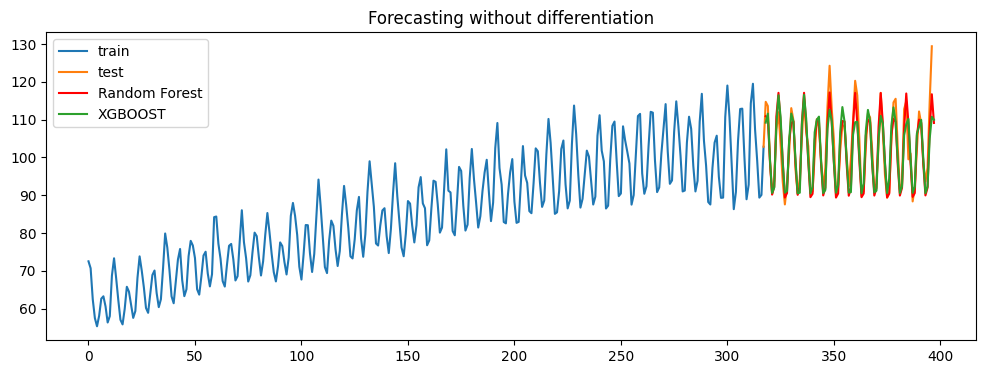

In [ ]:
# Forecasters
forecaster_rf = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=42),
                    lags= 12)
forecaster_gb = ForecasterAutoreg(
                    regressor = XGBRegressor(random_state=42),
                    lags= 12)
# Train
forecaster_rf.fit(Y.loc[:split])
forecaster_gb.fit(Y.loc[:split])

# Predict
predictions_rf = forecaster_rf.predict(steps=steps)
predictions_gb = forecaster_gb.predict(steps=steps)

# Error
error_rf = mean_absolute_error(Y.loc[split:], predictions_rf)
error_gb = mean_absolute_error(Y.loc[split:], predictions_gb)
print(f"Error (MAE) Random Forest: {error_rf:.2f}")
print(f"Error (MAE) Gradient Boosting: {error_gb:.2f}")

# Plot
fig, ax = plt.subplots(figsize=(12, 4), sharex=True, sharey=True)
data['value'].loc[:split].plot(ax=ax, label='train')
data['value'].loc[split:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Random Forest',color='red')
predictions_gb.plot(ax=ax, label='XGBOOST')
ax.set_title(f'Forecasting without differentiation')
ax.set_xlabel('')
ax.legend();

It is crucial for our analysis to explore the best hyperparameters for each algorithm.

In [ ]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=42),lags= 12) # Placeholder, the value will be overwritten

# Lags used as predictors
lags_grid = [8,10,12,16]

# Regressor hyperparameters
param_grid = {'n_estimators': [50,75, 100],
              'max_depth': [5, 10, 15,20],
              'min_samples_leaf':[5,10,15]}

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = Y.loc[:split],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 12,
                        refit       = True,
                        metric      = 'mean_absolute_error',
                        initial_train_size = int(len(Y.loc[:split])*0.7),
                        fixed_train_size   = True,
                        return_best = True,
                        verbose     = False)

Number of models compared: 144.


lags grid:   0%|          | 0/4 [00:00<?, ?it/s]

params grid:   0%|          | 0/36 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50}
  Backtesting metric: 3.0366551702279616



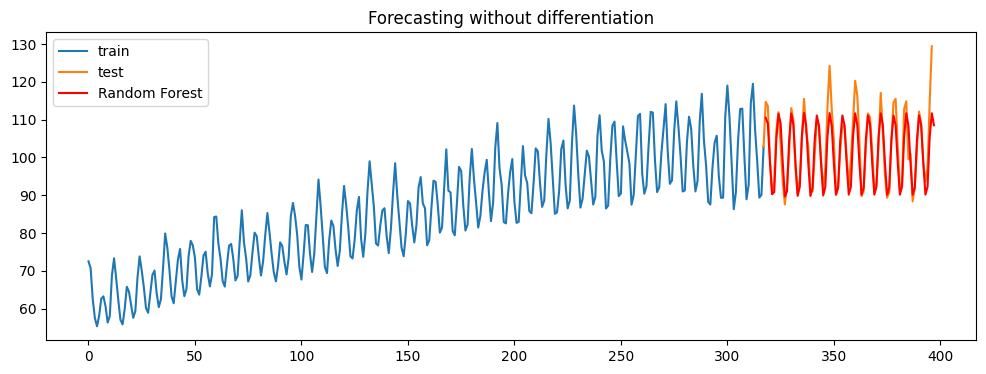

In [ ]:
ind=results_grid.params.index[0]

forecaster_rf = ForecasterAutoreg(
                    regressor = RandomForestRegressor(**results_grid.params[ind],random_state=123),
                    lags= 10)

forecaster_rf.fit(Y.loc[:split])

# Predict
predictions_rf = forecaster_rf.predict(steps=steps)

# Plot
fig, ax = plt.subplots(figsize=(12, 4), sharex=True, sharey=True)
data['value'].loc[:split].plot(ax=ax, label='train')
data['value'].loc[split:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Random Forest',color='red')
ax.set_title(f'Forecasting without differentiation')
ax.set_xlabel('')
ax.legend();

In [ ]:
forecaster = ForecasterAutoreg(
                regressor = XGBRegressor(random_state=42),lags= 12) # Placeholder, the value will be overwritten

# Lags used as predictors
lags_grid = [8,10,12,16]

# Regressor hyperparameters
param_grid = {'n_estimators': [50,75],
              'max_depth': [3,5, 10, 15],
              'alpha':[0.05,0.1,0.3,0.5,1,1.5],
              'lambda':[0.05,0.1,0.3,0.5,1,1.5]}

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = Y.loc[:split],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 12,
                        refit       = True,
                        metric      = 'mean_absolute_error',
                        initial_train_size = int(len(Y.loc[:split])*0.7),
                        fixed_train_size   = True,
                        return_best = True,
                        verbose     = False)

Number of models compared: 1152.


lags grid:   0%|          | 0/4 [00:00<?, ?it/s]

params grid:   0%|          | 0/288 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'alpha': 0.5, 'lambda': 1, 'max_depth': 3, 'n_estimators': 75}
  Backtesting metric: 2.833867939503987



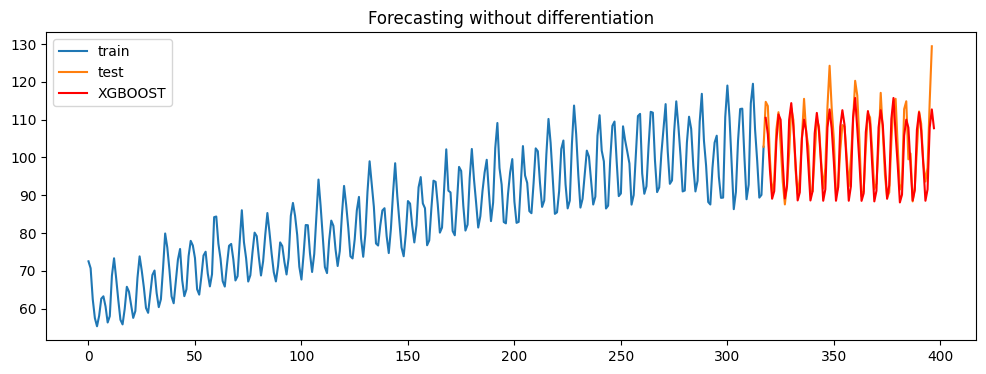

In [ ]:
ind=results_grid.params.index[0]

forecaster_xgb = ForecasterAutoreg(
                    regressor = XGBRegressor(**results_grid.params[ind],random_state=123),
                    lags= 10)

forecaster_xgb.fit(Y.loc[:split])

# Predict
predictions_xgb = forecaster_xgb.predict(steps=steps)

# Plot
fig, ax = plt.subplots(figsize=(12, 4), sharex=True, sharey=True)
data['value'].loc[:split].plot(ax=ax, label='train')
data['value'].loc[split:].plot(ax=ax, label='test')
predictions_xgb.plot(ax=ax, label='XGBOOST',color='red')
ax.set_title(f'Forecasting without differentiation')
ax.set_xlabel('')
ax.legend();

Forecasting with differentiation

Error (MAE) Random Forest: 12.17
Error (MAE) Gradient Boosting: 19.89


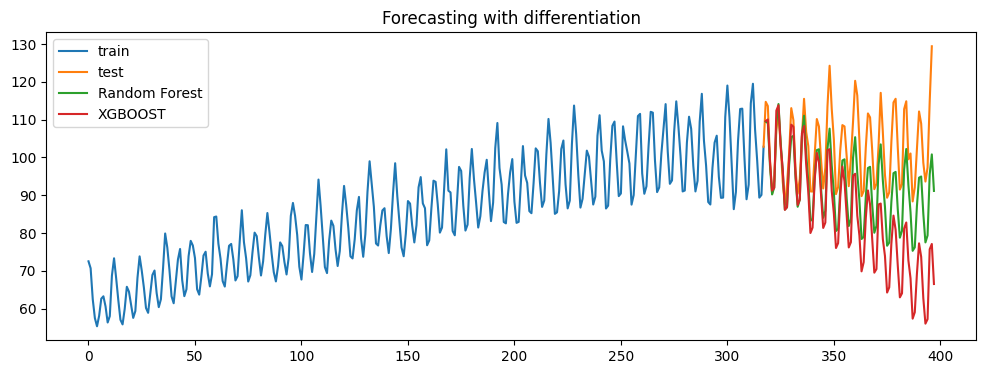

In [ ]:
# Forecasters
forecaster_rf = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=42),
                    lags = 12,differentiation = 1)
forecaster_gb = ForecasterAutoreg(
                    regressor = XGBRegressor(random_state=42),
                    lags = 12,differentiation = 1)
# Train
forecaster_rf.fit(Y.loc[:split])
forecaster_gb.fit(Y.loc[:split])

# Predict
predictions_rf = forecaster_rf.predict(steps=steps)
predictions_gb = forecaster_gb.predict(steps=steps)

# Error
error_rf = mean_absolute_error(Y.loc[split:], predictions_rf)
error_gb = mean_absolute_error(Y.loc[split:], predictions_gb)
print(f"Error (MAE) Random Forest: {error_rf:.2f}")
print(f"Error (MAE) Gradient Boosting: {error_gb:.2f}")

# Plot
fig, ax = plt.subplots(figsize=(12, 4), sharex=True, sharey=True)
data['value'].loc[:split].plot(ax=ax, label='train')
data['value'].loc[split:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Random Forest')
predictions_gb.plot(ax=ax, label='XGBOOST')
ax.set_title(f'Forecasting with differentiation')
ax.set_xlabel('')
ax.legend();

In [ ]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=42),lags= 12,differentiation = 1) # Placeholder, the value will be overwritten

# Lags used as predictors
lags_grid = [8,10,12,16]

# Regressor hyperparameters
param_grid = {'n_estimators': [50,75, 100],
              'max_depth': [5, 10, 15,20],
              'min_samples_leaf':[5,10,15]}

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = Y.loc[:split],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 12,
                        refit       = True,
                        metric      = 'mean_absolute_error',
                        initial_train_size = int(len(Y.loc[:split])*0.7),
                        fixed_train_size   = True,
                        return_best = True,
                        verbose     = False)

Number of models compared: 144.


lags grid:   0%|          | 0/4 [00:00<?, ?it/s]

params grid:   0%|          | 0/36 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50}
  Backtesting metric: 3.624600737686079



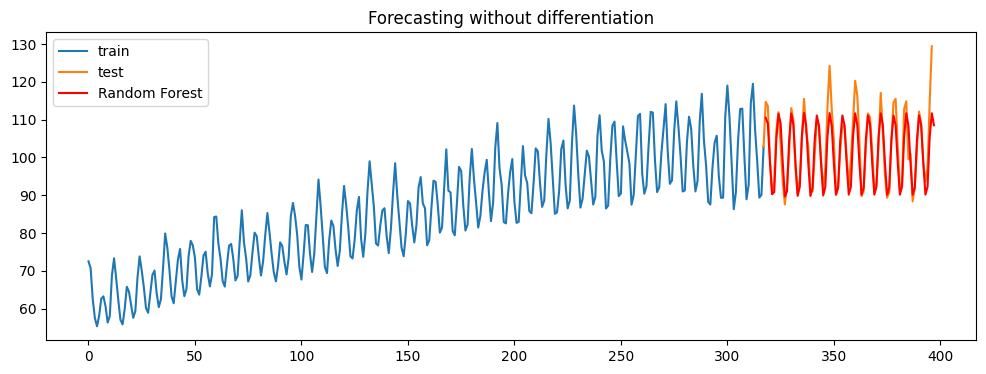

In [ ]:
ind=results_grid.params.index[0]

forecaster_rf = ForecasterAutoreg(
                    regressor = RandomForestRegressor(**results_grid.params[ind],random_state=123),
                    lags= 10)

forecaster_rf.fit(Y.loc[:split])

# Predict
predictions_rf = forecaster_rf.predict(steps=steps)

# Plot
fig, ax = plt.subplots(figsize=(12, 4), sharex=True, sharey=True)
data['value'].loc[:split].plot(ax=ax, label='train')
data['value'].loc[split:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Random Forest',color='red')
ax.set_title(f'Forecasting with differentiation')
ax.set_xlabel('')
ax.legend();

In [ ]:
forecaster = ForecasterAutoreg(
                regressor = XGBRegressor(random_state=42),lags= 12,differentiation = 1)

# Lags used as predictors
lags_grid = [8,10,12,16]

# Regressor hyperparameters
param_grid = {'n_estimators': [50,75],
              'max_depth': [3,5, 10, 15],
              'alpha':[0.05,0.1,0.3,0.5,1,1.5],
              'lambda':[0.05,0.1,0.3,0.5,1,1.5]}

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = Y.loc[:split],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 12,
                        refit       = True,
                        metric      = 'mean_absolute_error',
                        initial_train_size = int(len(Y.loc[:split])*0.7),
                        fixed_train_size   = True,
                        return_best = True,
                        verbose     = False)

Number of models compared: 1152.


lags grid:   0%|          | 0/4 [00:00<?, ?it/s]

params grid:   0%|          | 0/288 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 
  Parameters: {'alpha': 1, 'lambda': 1, 'max_depth': 5, 'n_estimators': 75}
  Backtesting metric: 3.2848646229500567



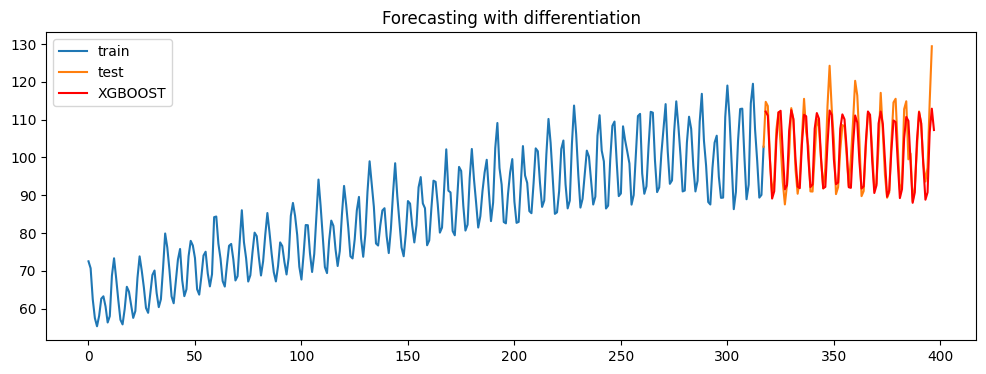

In [ ]:
ind=results_grid.params.index[0]

forecaster_xgb = ForecasterAutoreg(
                    regressor = XGBRegressor(**results_grid.params[ind],random_state=123),
                    lags= 10)

forecaster_xgb.fit(Y.loc[:split])

# Predict
predictions_xgb = forecaster_xgb.predict(steps=steps)

# Plot
fig, ax = plt.subplots(figsize=(12, 4), sharex=True, sharey=True)
data['value'].loc[:split].plot(ax=ax, label='train')
data['value'].loc[split:].plot(ax=ax, label='test')
predictions_xgb.plot(ax=ax, label='XGBOOST',color='red')
ax.set_title(f'Forecasting with differentiation')
ax.set_xlabel('')
ax.legend();